In [46]:
from datetime import datetime
from scipy.stats import entropy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### SKIP IF YOUR DON'T HAVE THE CSV FILES

In [156]:
houses = [
    'Woning 1 - Lichtervelde.csv',
    'Woning 2 - Ingelmunster.csv',
    'Woning 3 - Gent (Geen zonnepanelen).csv',
    'Woning 4 - Destelbergen.csv',
    'Woning 5 - Gullegem.csv',
    'Woning 6 - Wuustwezel.csv',
    'Woning 7 - Ardooie.csv',
]

house_data = pd.DataFrame()

for i, house in enumerate(houses):
    df = pd.read_csv(f'data/{house}', sep=';')
    df['house'] = house
    
    house_data = pd.concat([house_data, df], ignore_index=True)

house_data.to_parquet('datasets/houses_fluvius_data.parquet', index=False)
house_data.head(1000)
    

,Van (datum),Van (tijdstip),Tot (datum),Tot (tijdstip),EAN-code,Meter,Metertype,Register,Volume,Eenheid,Validatiestatus,Omschrijving,house
0,06-02-2025,00:00:00,06-02-2025,00:15:00,"=""541448820045413443""",1SAG3200296270,Digitale meter,Afname Nacht,"0,000",kWh,Geschat,NaN,Woning 1 - Lichtervelde.csv
1,06-02-2025,00:00:00,06-02-2025,00:15:00,"=""541448820045413443""",1SAG3200296270,Digitale meter,Injectie Nacht,"0,000",kWh,Geschat,NaN,Woning 1 - Lichtervelde.csv
2,06-02-2025,00:15:00,06-02-2025,00:30:00,"=""541448820045413443""",1SAG3200296270,Digitale meter,Afname Nacht,"0,000",kWh,Geschat,NaN,Woning 1 - Lichtervelde.csv
3,06-02-2025,00:15:00,06-02-2025,00:30:00,"=""541448820045413443""",1SAG3200296270,Digitale meter,Injectie Nacht,"0,000",kWh,Geschat,NaN,Woning 1 - Lichtervelde.csv
4,06-02-2025,00:30:00,06-02-2025,00:45:00,"=""541448820045413443""",1SAG3200296270,Digitale meter,Afname Nacht,"0,000",kWh,Geschat,NaN,Woning 1 - Lichtervelde.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,11-02-2025,04:15:00,11-02-2025,04:30:00,"=""541448820045413443""",1SAG3200296270,Digitale meter,Injectie Nacht,"0,000",kWh,Uitgelezen,NaN,Woning 1 - Lichtervelde.csv
996,11-02-2025,04:30:00,11-02-2025,04:45:00,"=""541448820045413443""",1SAG3200296270,Digitale meter,Afname Nacht,"0,032",kWh,Uitgelezen,NaN,Woning 1 - Lichtervelde.csv
997,11-02-2025,04:30:00,11-02-2025,04:45:00,"=""541448820045413443""",1SAG3200296270,Digitale meter,Injectie Nacht,"0,000",kWh,Uitgelezen,NaN,Woning 1 - Lichtervelde.csv
998,11-02-2025,04:45:00,11-02-2025,05:00:00,"=""541448820045413443""",1SAG3200296270,Digitale meter,Afname Nacht,"0,154",kWh,Uitgelezen,NaN,Woning 1 - Lichtervelde.csv


### Start here for analysis

Algemene analyse van de dataset:

In [2]:
df = pd.read_parquet('datasets/houses_fluvius_data.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108408 entries, 0 to 1108407
Data columns (total 13 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   Van (datum)      1108408 non-null  object
 1   Van (tijdstip)   1108408 non-null  object
 2   Tot (datum)      1108408 non-null  object
 3   Tot (tijdstip)   1108408 non-null  object
 4   EAN-code         1108408 non-null  object
 5   Meter            1108408 non-null  object
 6   Metertype        1108408 non-null  object
 7   Register         1108408 non-null  object
 8   Volume           1106478 non-null  object
 9   Eenheid          1108408 non-null  object
 10  Validatiestatus  1108408 non-null  object
 11  Omschrijving     544320 non-null   object
 12  house            1108408 non-null  object
dtypes: object(13)
memory usage: 109.9+ MB


Visualisatie per huis:

In [3]:
df["Volume"] = df["Volume"].fillna(0)

In [4]:
df_house_1 = df[df['house'] == 'Woning 1 - Lichtervelde.csv']
df_house_2 = df[df['house'] == 'Woning 2 - Ingelmunster.csv']
df_house_3 = df[df['house'] == 'Woning 3 - Gent (Geen zonnepanelen).csv']
df_house_4 = df[df['house'] == 'Woning 4 - Destelbergen.csv']
df_house_5 = df[df['house'] == 'Woning 5 - Gullegem.csv']
df_house_6 = df[df['house'] == 'Woning 6 - Wuustwezel.csv']
df_house_7 = df[df['house'] == 'Woning 7 - Ardooie.csv']

houses = [
    df_house_1,
    df_house_2,
    df_house_3,
    df_house_4,
    df_house_5,
    df_house_6,
    df_house_7,
]

In [5]:
for i, house in enumerate(houses):
#i = 0
    houses[i]['dateTime_start'] = pd.to_datetime(houses[i]['Van (datum)'] + ' ' + houses[i]['Van (tijdstip)'], format="%d-%m-%Y %H:%M:%S")
    houses[i]['dateTime_end'] = pd.to_datetime(houses[i]['Tot (datum)'] + ' ' + houses[i]['Tot (tijdstip)'], format="%d-%m-%Y %H:%M:%S")
    houses[i]['Volume'] = houses[i]["Volume"].str.replace(r"\s+", "_", regex=True)
    houses[i]['Volume'] = houses[i]['Volume'].str.replace(',', '.').astype(float)
houses[1].head(100)
    

/var/folders/yg/5hgw5_z931sd5sx564slbskh0000gq/T/ipykernel_51030/3884422356.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  houses[i]['dateTime_start'] = pd.to_datetime(houses[i]['Van (datum)'] + ' ' + houses[i]['Van (tijdstip)'], format="%d-%m-%Y %H:%M:%S")
/var/folders/yg/5hgw5_z931sd5sx564slbskh0000gq/T/ipykernel_51030/3884422356.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  houses[i]['dateTime_end'] = pd.to_datetime(houses[i]['Tot (datum)'] + ' ' + houses[i]['Tot (tijdstip)'], format="%d-%m-%Y

,Van (datum),Van (tijdstip),Tot (datum),Tot (tijdstip),EAN-code,Meter,Metertype,Register,Volume,Eenheid,Validatiestatus,Omschrijving,house,dateTime_start,dateTime_end
41848,11-09-2022,00:00:00,11-09-2022,00:15:00,"=""541448820067028069""",1SAG3100069254,Digitale meter,Afname Nacht,0.060,kWh,Uitgelezen,None,Woning 2 - Ingelmunster.csv,2022-09-11 00:00:00,2022-09-11 00:15:00
41849,11-09-2022,00:00:00,11-09-2022,00:15:00,"=""541448820067028069""",1SAG3100069254,Digitale meter,Injectie Nacht,0.000,kWh,Uitgelezen,None,Woning 2 - Ingelmunster.csv,2022-09-11 00:00:00,2022-09-11 00:15:00
41850,11-09-2022,00:15:00,11-09-2022,00:30:00,"=""541448820067028069""",1SAG3100069254,Digitale meter,Afname Nacht,0.062,kWh,Uitgelezen,None,Woning 2 - Ingelmunster.csv,2022-09-11 00:15:00,2022-09-11 00:30:00
41851,11-09-2022,00:15:00,11-09-2022,00:30:00,"=""541448820067028069""",1SAG3100069254,Digitale meter,Injectie Nacht,0.000,kWh,Uitgelezen,None,Woning 2 - Ingelmunster.csv,2022-09-11 00:15:00,2022-09-11 00:30:00
41852,11-09-2022,00:30:00,11-09-2022,00:45:00,"=""541448820067028069""",1SAG3100069254,Digitale meter,Afname Nacht,0.045,kWh,Uitgelezen,None,Woning 2 - Ingelmunster.csv,2022-09-11 00:30:00,2022-09-11 00:45:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41943,11-09-2022,11:45:00,11-09-2022,12:00:00,"=""541448820067028069""",1SAG3100069254,Digitale meter,Injectie Nacht,0.191,kWh,Uitgelezen,None,Woning 2 - Ingelmunster.csv,2022-09-11 11:45:00,2022-09-11 12:00:00
41944,11-09-2022,12:00:00,11-09-2022,12:15:00,"=""541448820067028069""",1SAG3100069254,Digitale meter,Afname Nacht,0.000,kWh,Uitgelezen,None,Woning 2 - Ingelmunster.csv,2022-09-11 12:00:00,2022-09-11 12:15:00
41945,11-09-2022,12:00:00,11-09-2022,12:15:00,"=""541448820067028069""",1SAG3100069254,Digitale meter,Injectie Nacht,0.258,kWh,Uitgelezen,None,Woning 2 - Ingelmunster.csv,2022-09-11 12:00:00,2022-09-11 12:15:00
41946,11-09-2022,12:15:00,11-09-2022,12:30:00,"=""541448820067028069""",1SAG3100069254,Digitale meter,Afname Nacht,0.033,kWh,Uitgelezen,None,Woning 2 - Ingelmunster.csv,2022-09-11 12:15:00,2022-09-11 12:30:00


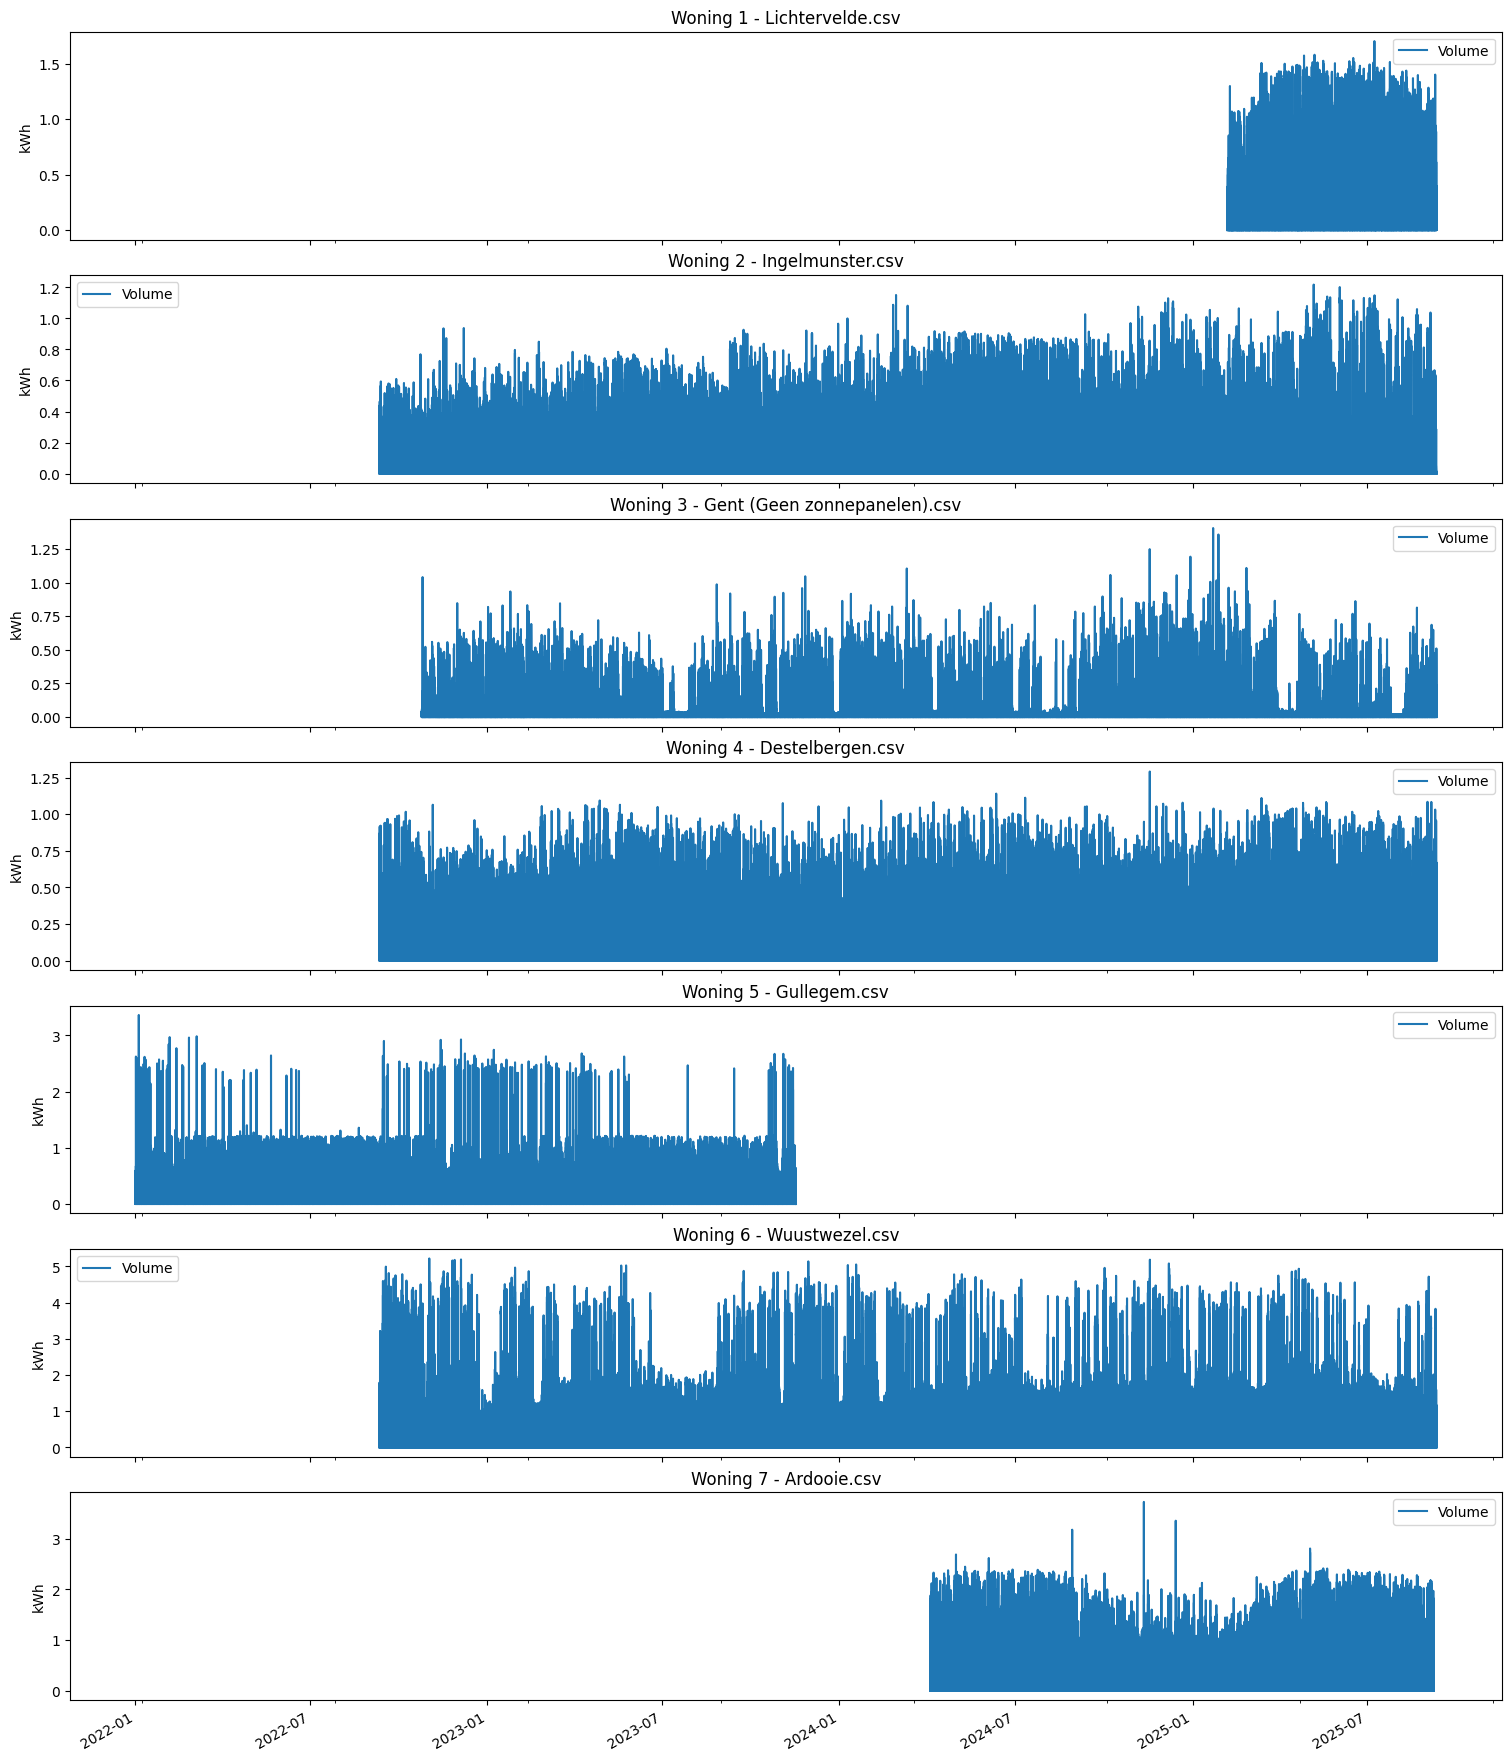

In [ ]:
def display_multi_usage_over_time(houses):
    # one row per house; share x for aligned time axis
    n = len(houses)
    fig, axes = plt.subplots(
        nrows=n, ncols=1, figsize=(15, 2.5*n),
        sharex=True, constrained_layout=True
    )

    if n == 1:
        axes = [axes]

    for ax, house in zip(axes, houses):
        house_copy = house.copy()
        house_copy = house_copy.sort_values('dateTime_start')
        house_copy.set_index('dateTime_start', inplace=True)
        house_copy.plot(y=['Volume'], ax=ax)  # gives legend once per subplot
        ax.set_title(house_copy['house'].iloc[0])
        ax.set_xlabel('')  # keep only bottom x-label
        ax.set_ylabel('kWh')

    # If not using constrained_layout=True, uncomment:
    # fig.tight_layout()

    plt.show()

display_multi_usage_over_time(houses)

### Variatie meten

* Standaarddeviatie: Meet de spreiding van het verbruik rond het gemiddelde. Een lage standaarddeviatie betekent stabiel verbruik.

* Variatiecoëfficiënt: Standaarddeviatie gedeeld door het gemiddelde, zodat we huishoudens met verschillend totaalverbruik kunnen vergelijken.

In [35]:
stds = []
means = []
cv = []
labels = []

for i, df in enumerate(houses):
    mean = df['Volume'].mean()
    std = df['Volume'].std()  # sample std, ddof=1
    coeff_var = std / mean if mean != 0 else 0
    means.append(mean)
    stds.append(std)
    cv.append(coeff_var)
    labels.append(df['house'].iloc[0].split('.')[0])

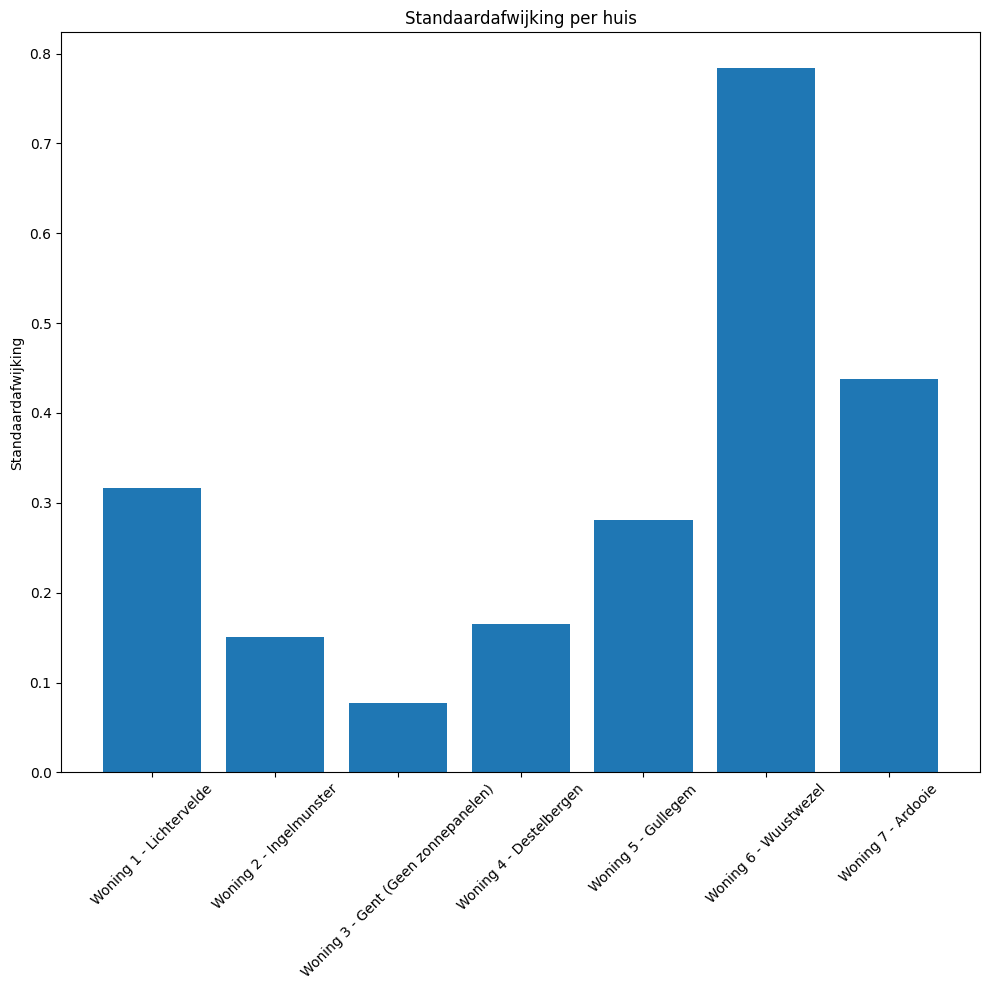

In [36]:
# De spreiding van het verbruik rond het gemiddelde. Een lage standaarddeviatie betekent stabiel verbruik.
plt.figure(figsize=(10, 10))
plt.bar(labels, stds)
plt.ylabel('Standaardafwijking')
plt.title('Standaardafwijking per huis')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

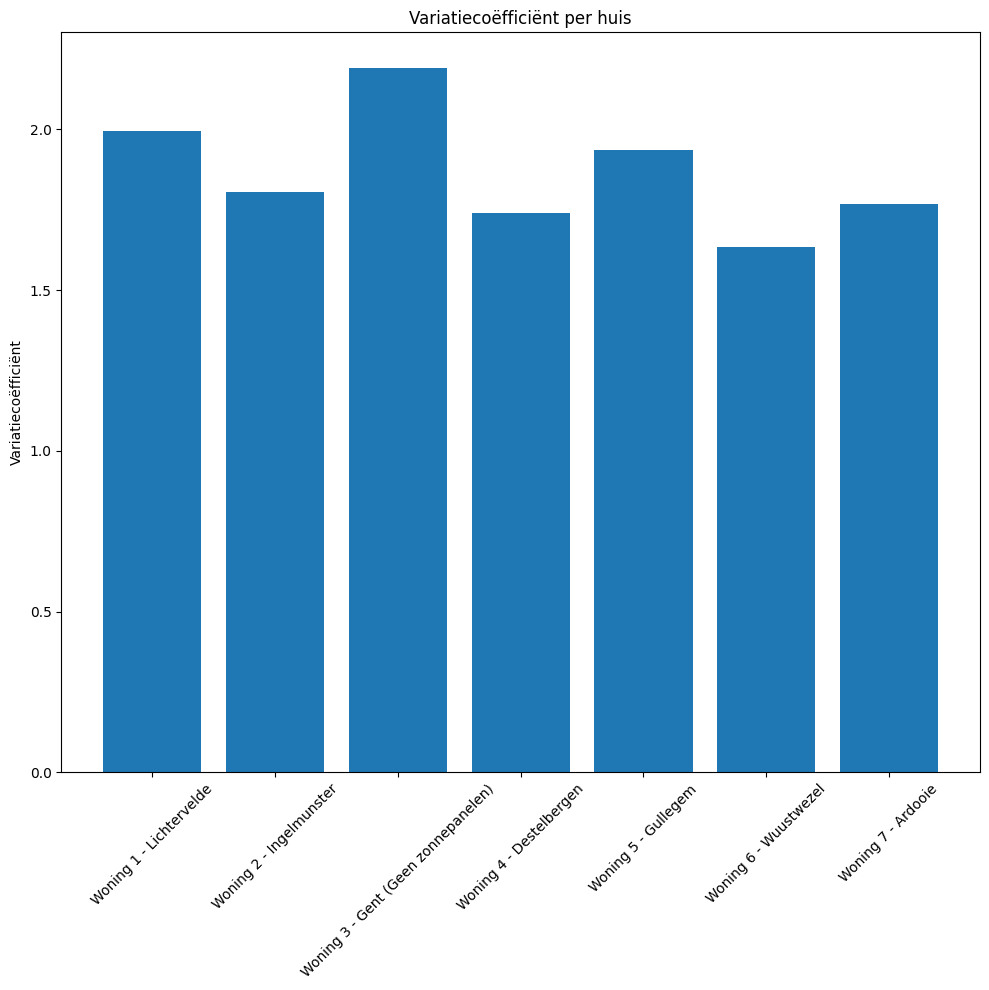

In [37]:
# Standaarddeviatie gedeeld door het gemiddelde, zodat je huishoudens met verschillend totaalverbruik kunt vergelijken.
plt.figure(figsize=(10, 10))
plt.bar(labels, cv)
plt.ylabel('Variatiecoëfficiënt')
plt.title('Variatiecoëfficiënt per huis')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Piekanalyse

In [32]:
pieken = []
max_values = []
min_values = []
labels = []

for i, df in enumerate(houses):
    mean = df['Volume'].mean()
    std = df['Volume'].std()
    # Pieken: kwartieren > 2 std boven het gemiddelde
    piek_mask = df['Volume'] > (mean + 2 * std)
    n_pieken = piek_mask.sum()
    pieken.append(n_pieken)
    # Max/min verbruik
    max_values.append(df['Volume'].max())
    min_values.append(df['Volume'].min())
    labels.append(df['house'].iloc[0].split('.')[0])

# Verschil max-min
max_min_diff = [mx - mn for mx, mn in zip(max_values, min_values)]

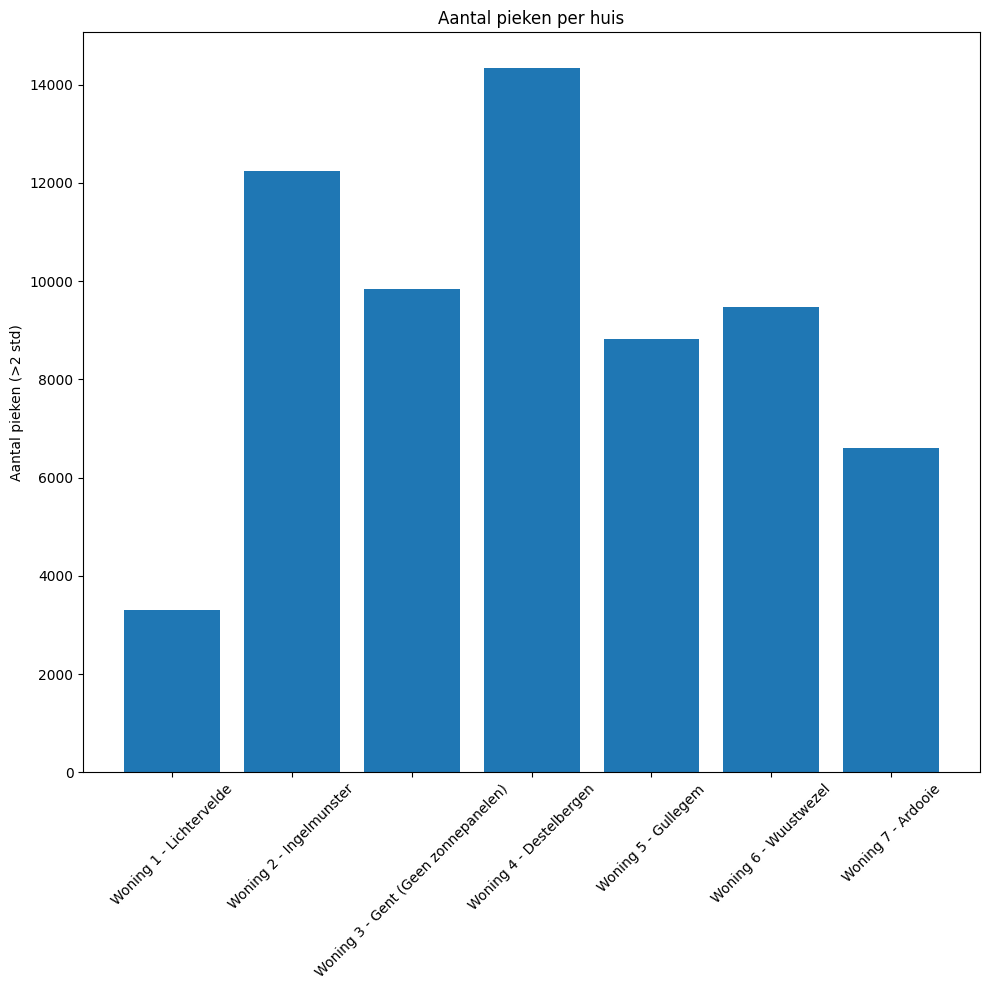

In [38]:
#Aantal pieken: Tel het aantal kwartieren waarin het verbruik sterk afwijkt van het gemiddelde
plt.figure(figsize=(10, 10))
plt.bar(labels, pieken)
plt.ylabel('Aantal pieken (>2 std)')
plt.title('Aantal pieken per huis')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

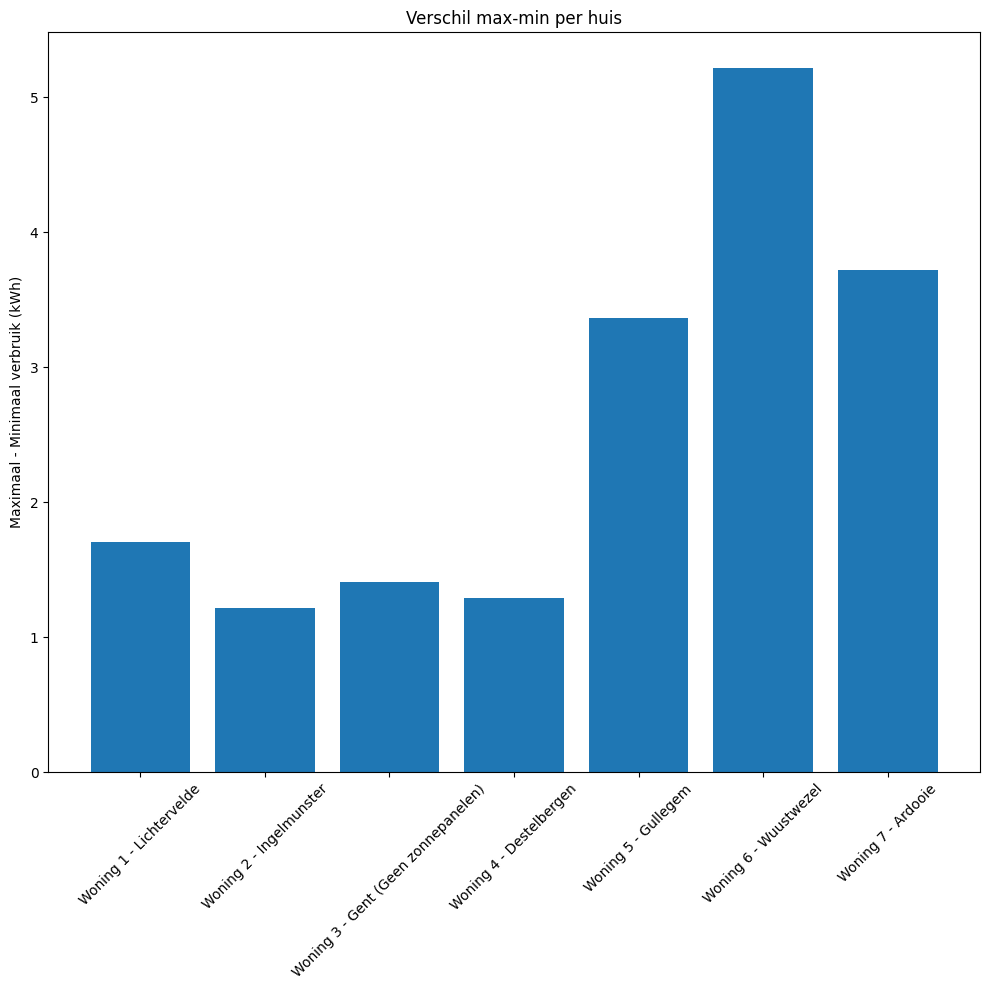

In [39]:
# Maximaal/minimaal verbruik: Groot verschil wijst op minder stabiel gedrag.
plt.figure(figsize=(10, 10))
plt.bar(labels, max_min_diff)
plt.ylabel('Maximaal - Minimaal verbruik (kWh)')
plt.title('Verschil max-min per huis')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Autocorrelatie

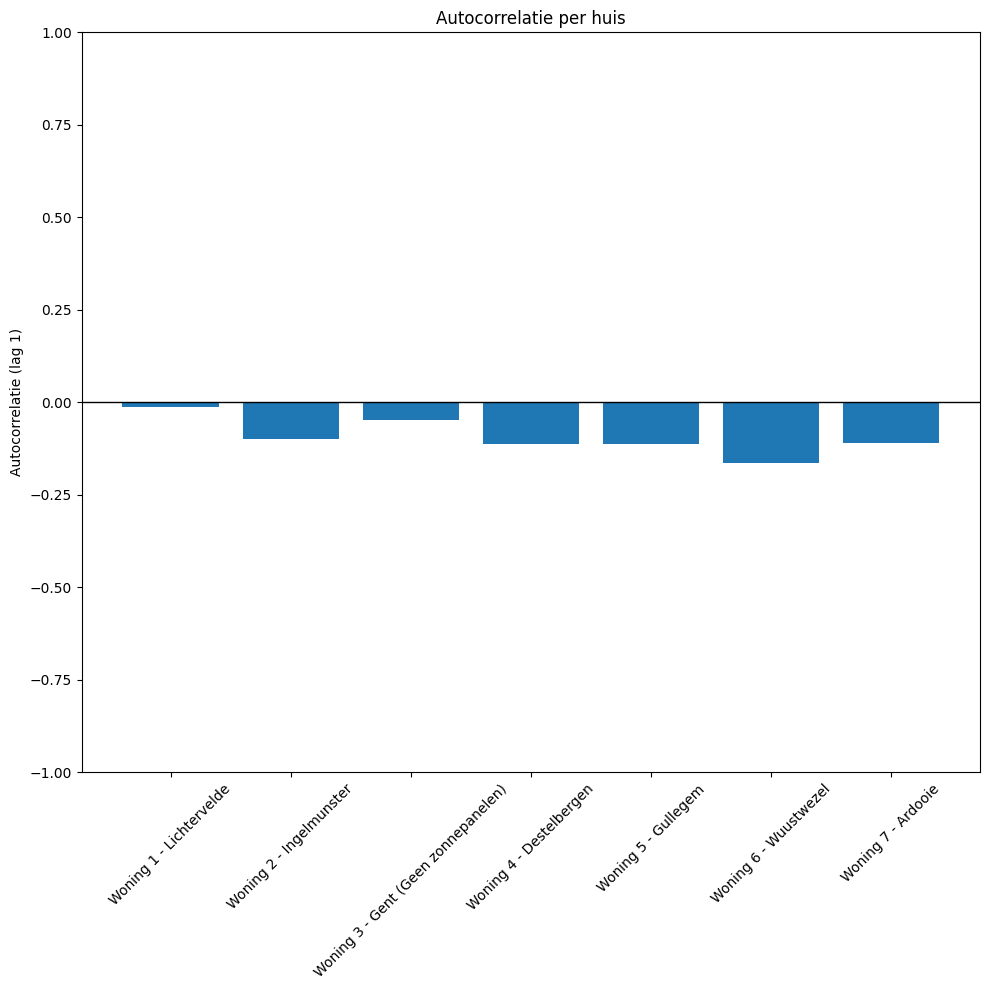

In [45]:
autocorrs = []
labels = []

for i, df in enumerate(houses):
    # Zorg dat de data gesorteerd is op tijd
    df_sorted = df.sort_values('dateTime_start')
    autocorr = df_sorted['Volume'].autocorr(lag=1)
    autocorrs.append(autocorr)
    labels.append(df['house'].iloc[0].split('.')[0])

plt.figure(figsize=(10, 10))
plt.bar(labels, autocorrs)
plt.ylabel('Autocorrelatie (lag 1)')
plt.title('Autocorrelatie per huis')
plt.ylim(-1, 1)
plt.axhline(y=0, color='black', linewidth=1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Entropie of onvoorspelbaarheid

Per huis de Shannon-entropie van de tijdreeks berekenen. Een lagere entropie betekent voorspelbaarder en stabieler verbruik.

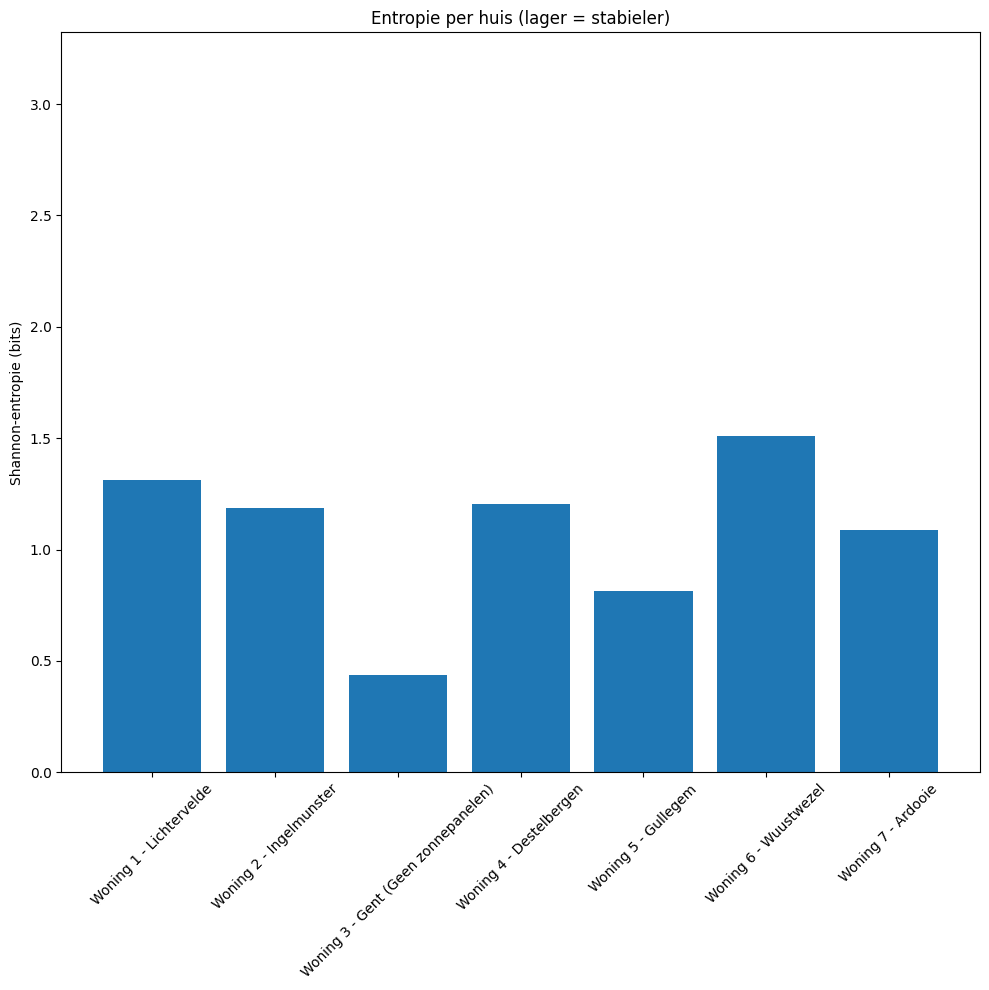

In [50]:
entropies = []
labels = []

n_bins = 10  # Aantal bins voor discretisatie

for i, df in enumerate(houses):
    # Discretiseer de verbruikswaarden
    df_copy = df.copy()
    df_copy = df_copy.dropna(subset=['Volume'])
    counts, _ = np.histogram(df_copy['Volume'], bins=n_bins, density=False)
    probs = counts / counts.sum()  # Kansverdeling
    # Filter lege bins uit (anders log(0))
    probs = probs[probs > 0]
    # Shannon-entropie in bits
    ent = entropy(probs, base=2)
    entropies.append(ent)
    labels.append(df['house'].iloc[0].split('.')[0])

plt.figure(figsize=(10, 10))
plt.bar(labels, entropies)
plt.ylabel('Shannon-entropie (bits)')
plt.title('Entropie per huis (lager = stabieler)')
plt.ylim(0, np.log2(n_bins))  # Maximale entropie = log2(aantal bins)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Load shifting score

In [ ]:
# TODO: dynamische prijzen opvragen indien beschikbaar

# load_shift_scores = []
# labels = []

# price_df = pd.DataFrame()  # TODO: dynamische prijzen opvragen indien beschikbaar

# for i, df in enumerate(houses):
#     # Merge verbruiksdata met prijsdata op tijd
#     merged = pd.merge(df, price_df, on='dateTime_start')
#     # Correlatie tussen verbruik en prijs
#     corr = merged['Volume'].corr(merged['Price'])
#     load_shift_scores.append(corr)
#     labels.append(df['house'].iloc[0].split('.')[0])

# plt.figure(figsize=(10, 4))
# plt.bar(labels, load_shift_scores)
# plt.ylabel('Correlatie verbruik vs. prijs')
# plt.title('Load shifting score per huis (lager = meer load shifting)')
# plt.ylim(-1, 1)
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

### Rolling window analyses

Over 1 dag:

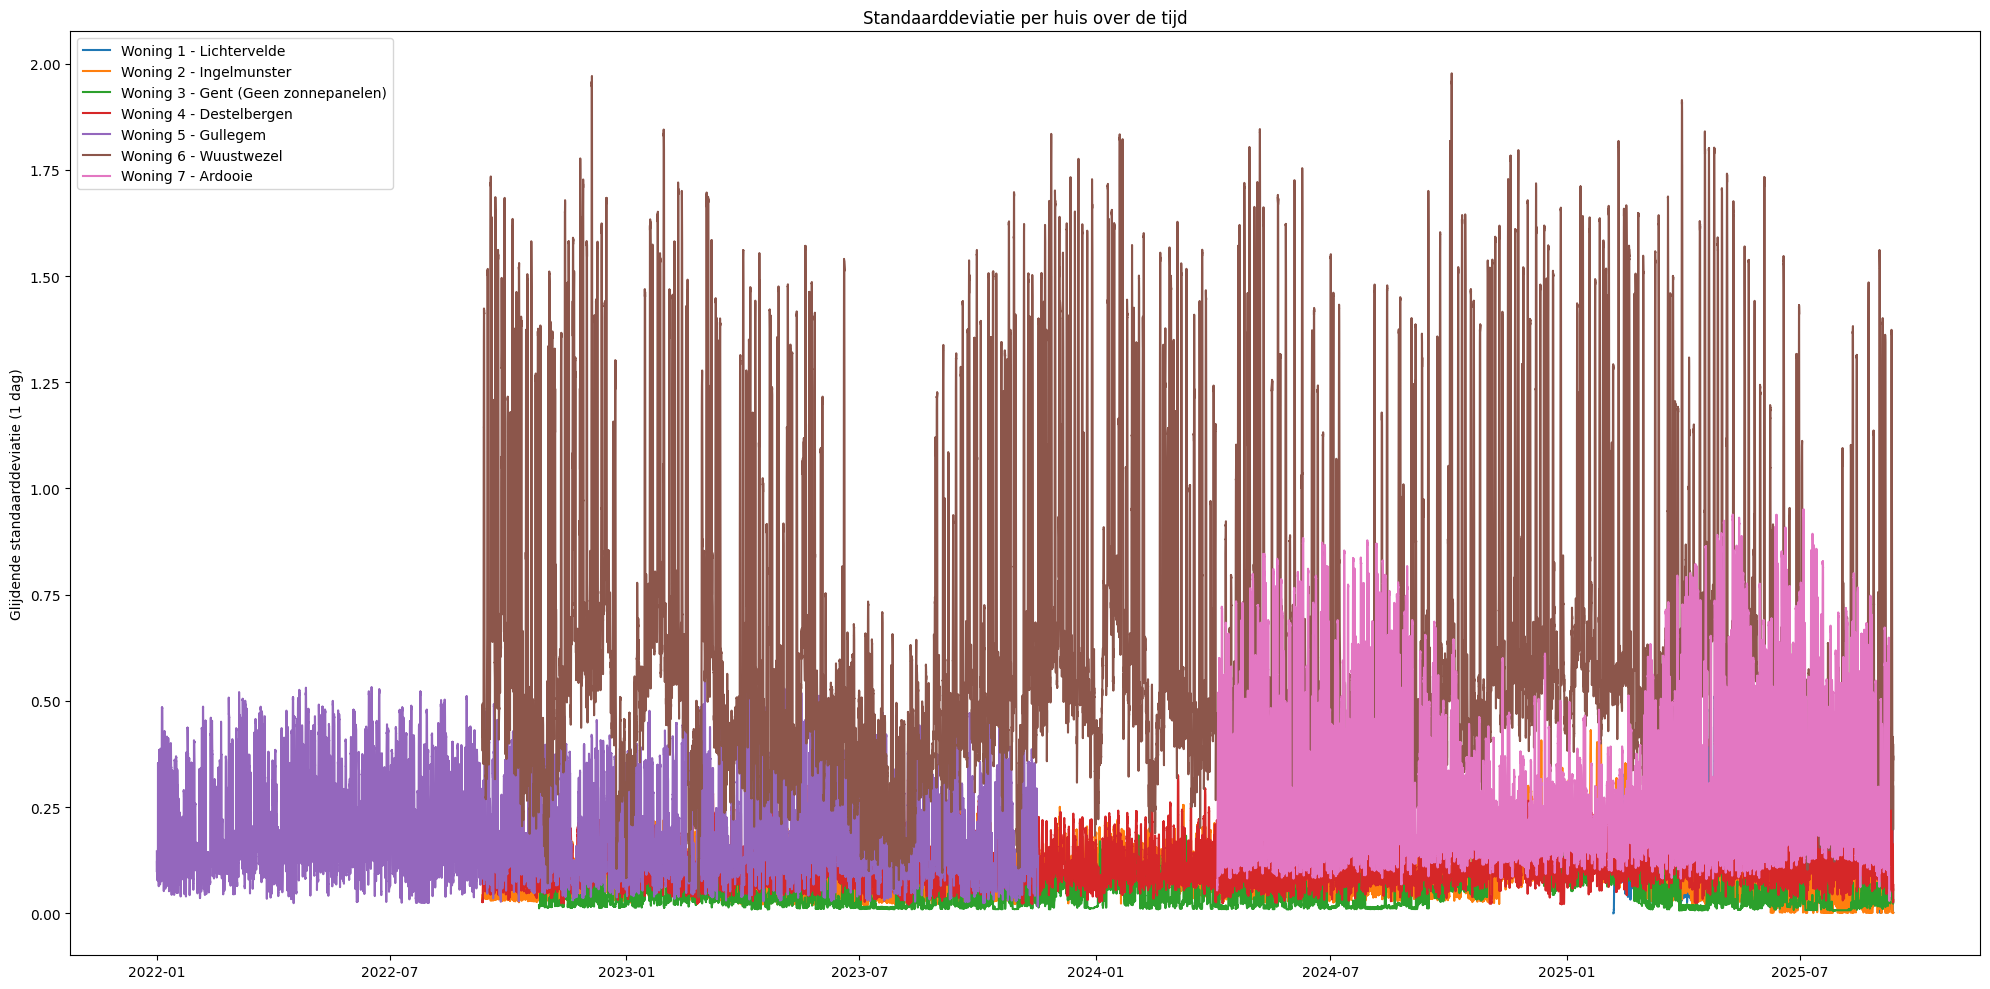

In [ ]:
window = 96  # 96 kwartieren = 1 dag
plt.figure(figsize=(20, 10))
for i, df in enumerate(houses):
    df_sorted = df.sort_values('dateTime_start')
    # Bereken de glijdende standaarddeviatie
    rolling_std = df_sorted['Volume'].rolling(window=window, min_periods=1).std()
    plt.plot(df_sorted['dateTime_start'], rolling_std, label=df['house'].iloc[0].split('.')[0])
plt.ylabel('Glijdende standaarddeviatie (1 dag)')
plt.title('Standaarddeviatie per huis over de tijd')
plt.legend()
plt.tight_layout()
plt.show()

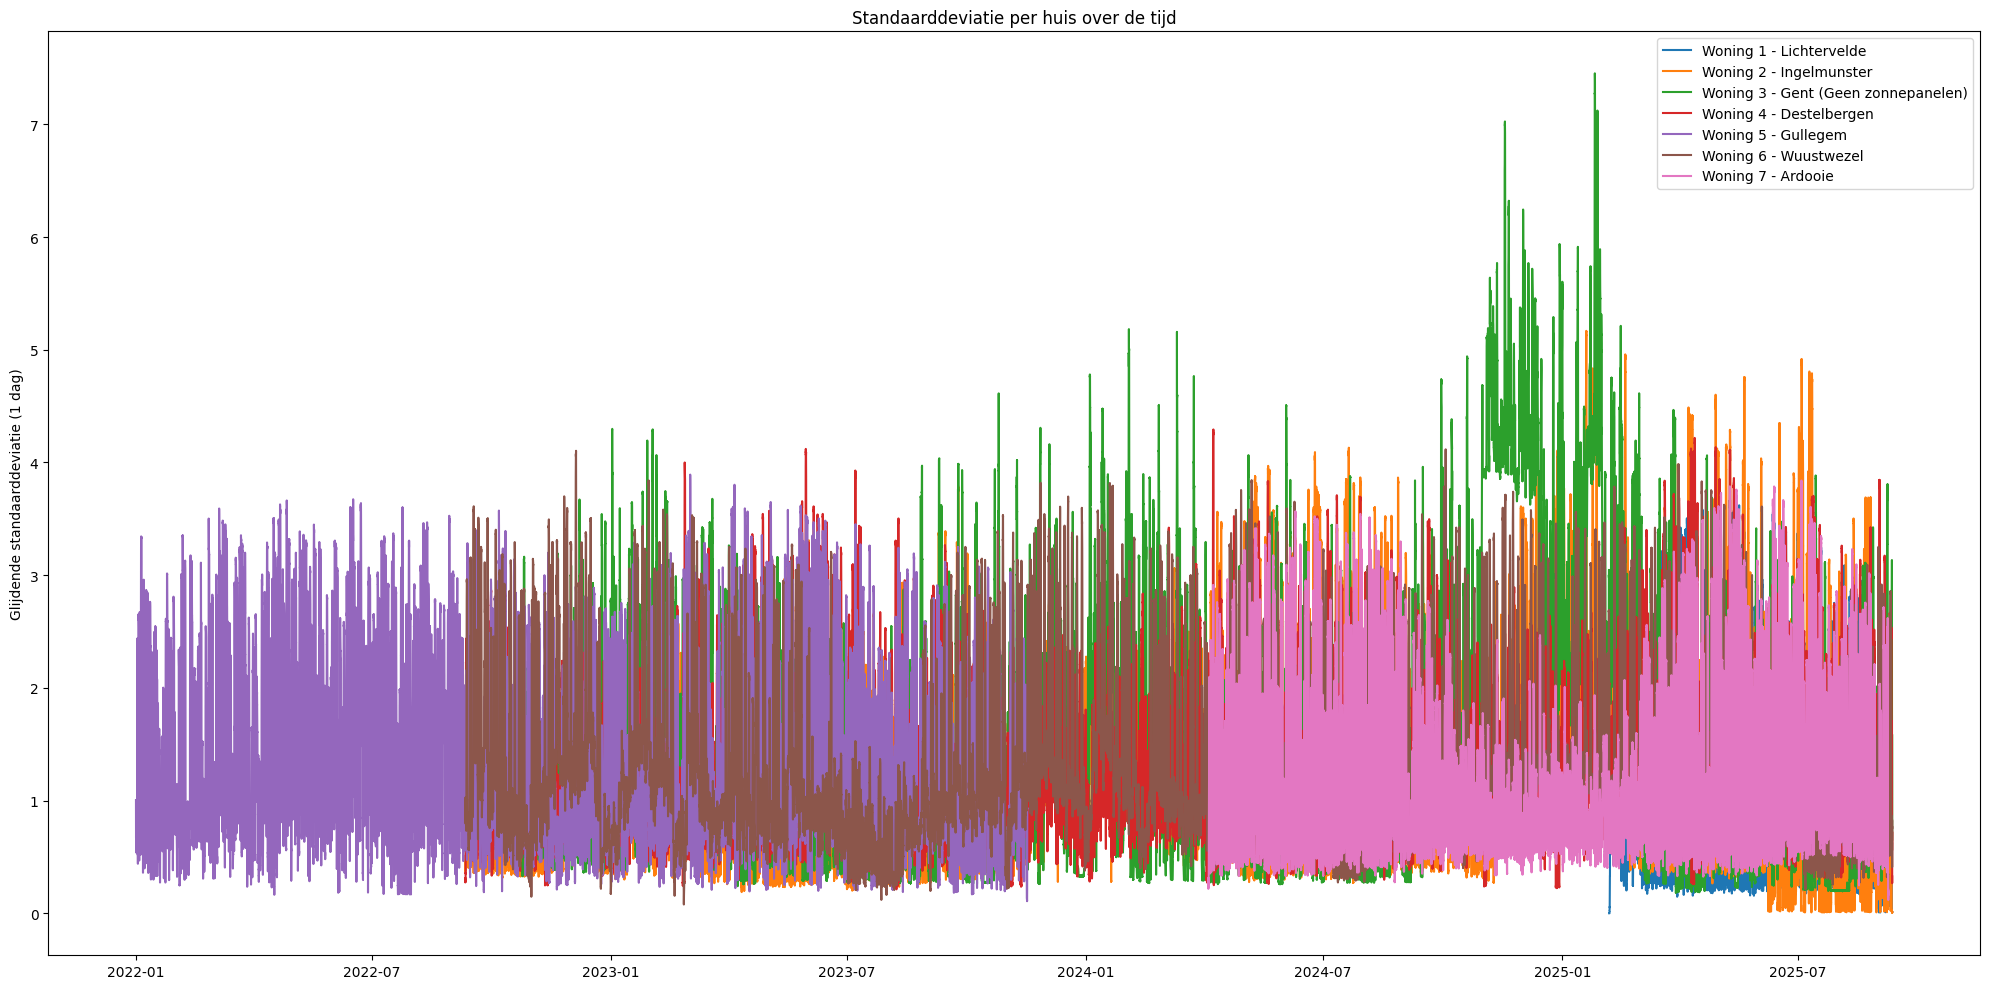

In [57]:
# Variatie over een rolling window
window = 96  # 96 kwartieren = 1 dag
plt.figure(figsize=(20, 10))
for i, df in enumerate(houses):
    df_sorted = df.sort_values('dateTime_start')
    mean = df_sorted['Volume'].mean()
    # Bereken de glijdende standaarddeviatie
    rolling_std = df_sorted['Volume'].rolling(window=window, min_periods=1).std() / mean
    plt.plot(df_sorted['dateTime_start'], rolling_std, label=df['house'].iloc[0].split('.')[0])
plt.ylabel('Glijdende standaarddeviatie (1 dag)')
plt.title('Standaarddeviatie per huis over de tijd')
plt.legend()
plt.tight_layout()
plt.show()


Over 1 week:

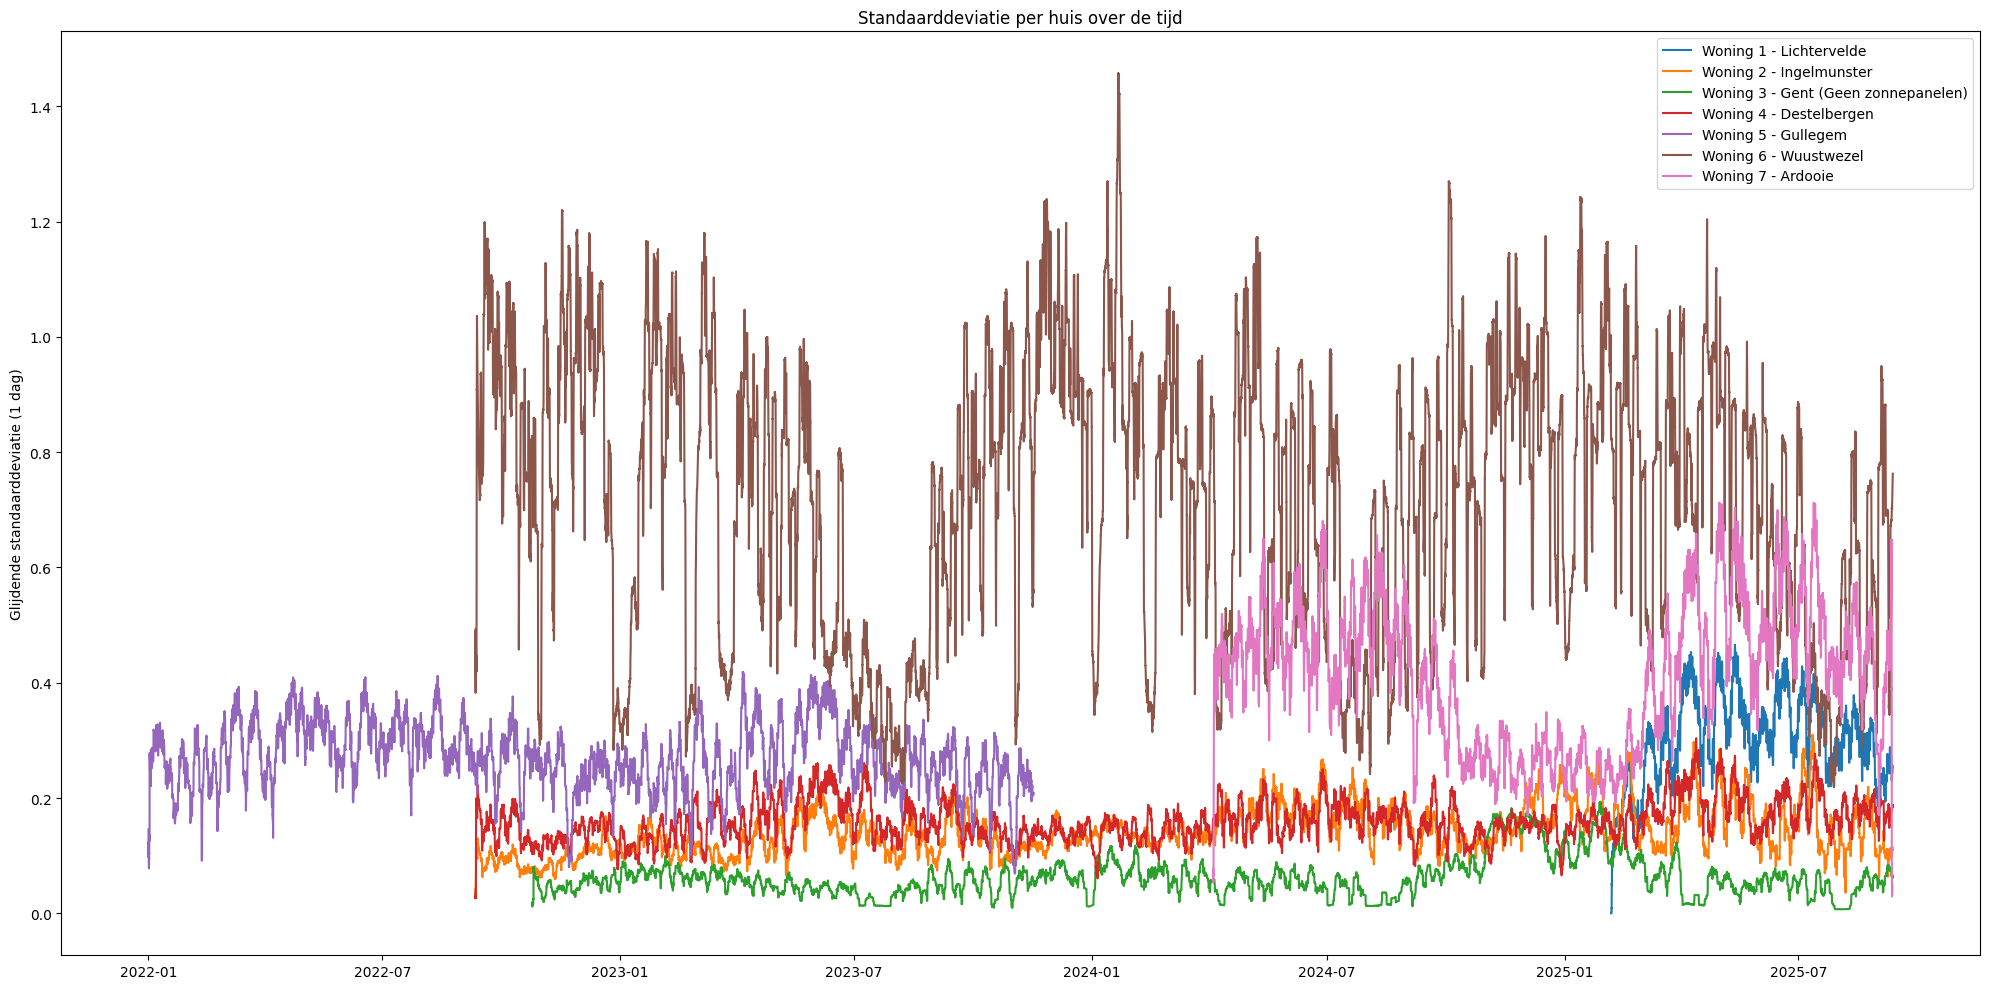

In [ ]:
window = 672  # 672 kwartieren = 1 week
plt.figure(figsize=(20, 10))
for i, df in enumerate(houses):
    df_sorted = df.sort_values('dateTime_start')
    # Bereken de glijdende standaarddeviatie
    rolling_std = df_sorted['Volume'].rolling(window=window, min_periods=1).std()
    plt.plot(df_sorted['dateTime_start'], rolling_std, label=df['house'].iloc[0].split('.')[0])
plt.ylabel('Glijdende standaarddeviatie (1 dag)')
plt.title('Standaarddeviatie per huis over de tijd')
plt.legend()
plt.tight_layout()
plt.show()

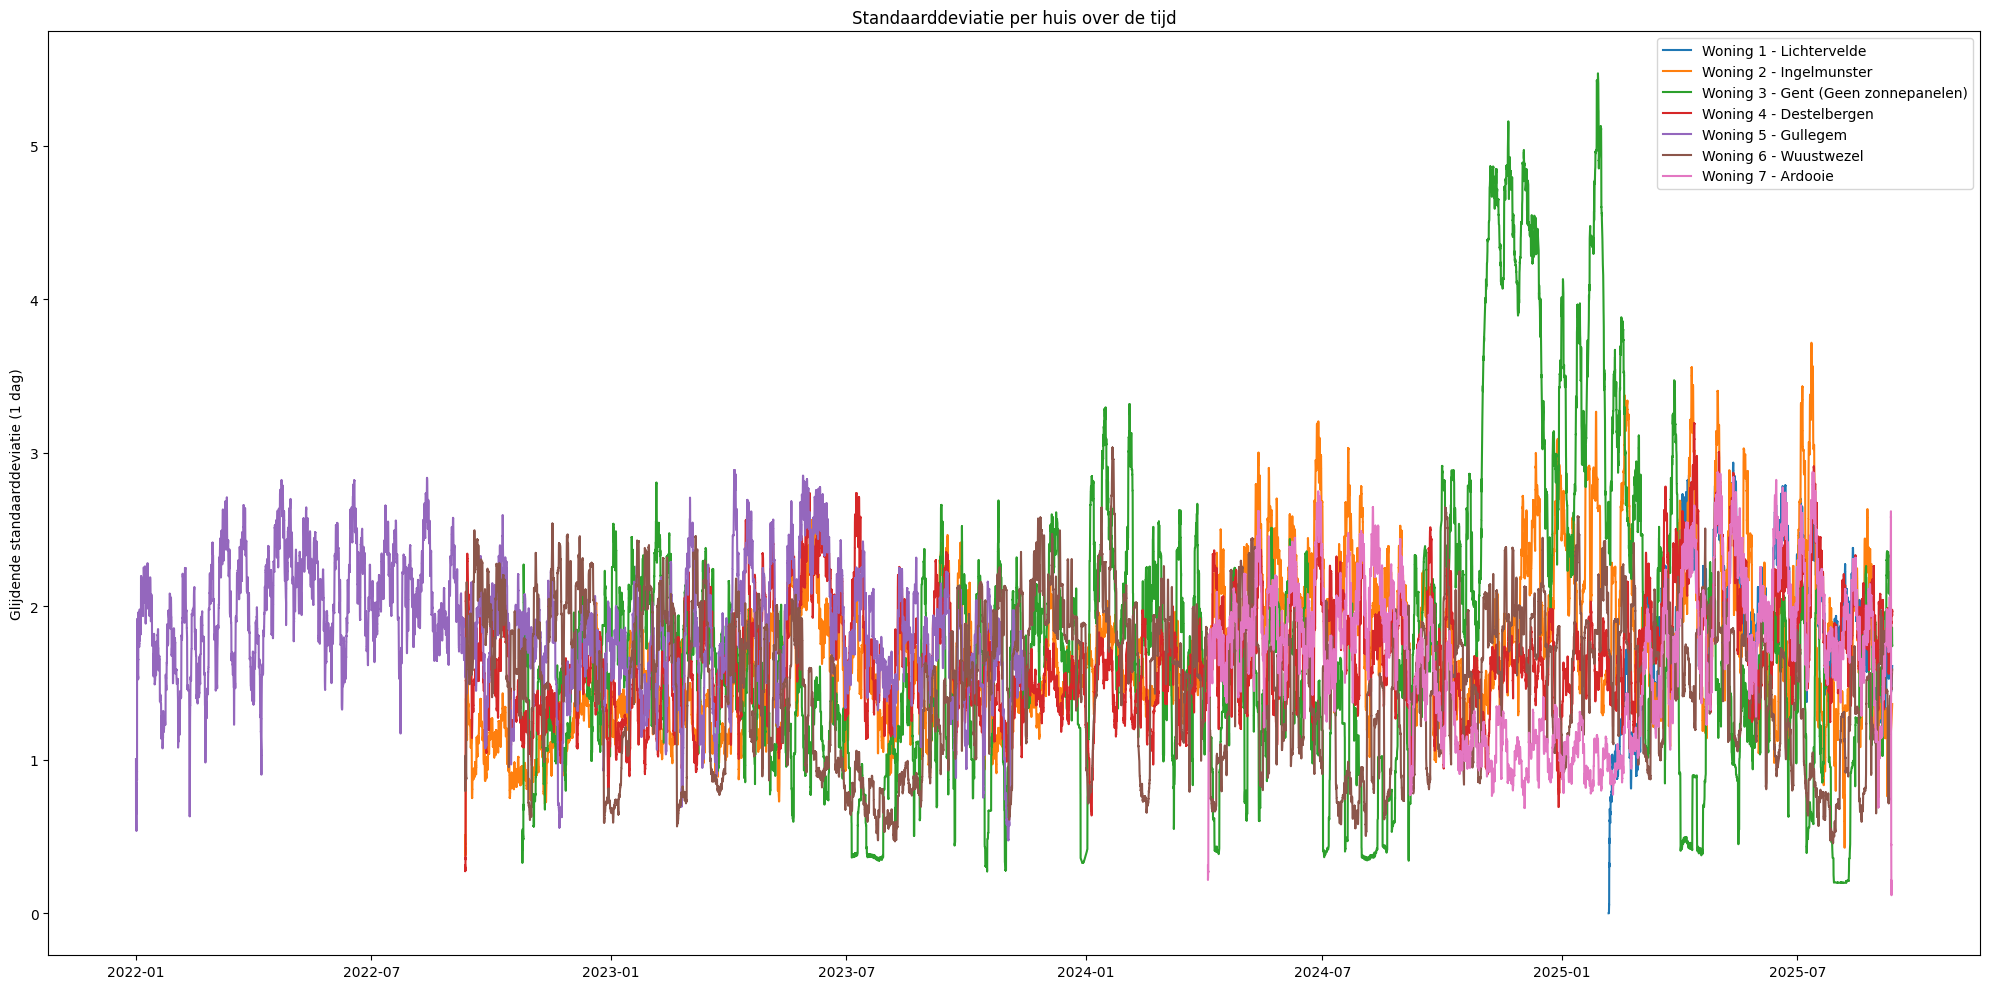

In [58]:
window = 672  # 672 kwartieren = 1 week
plt.figure(figsize=(20, 10))
for i, df in enumerate(houses):
    df_sorted = df.sort_values('dateTime_start')
    mean = df_sorted['Volume'].mean()
    # Bereken de glijdende standaarddeviatie
    rolling_std = df_sorted['Volume'].rolling(window=window, min_periods=1).std() / mean
    plt.plot(df_sorted['dateTime_start'], rolling_std, label=df['house'].iloc[0].split('.')[0])
plt.ylabel('Glijdende standaarddeviatie (1 dag)')
plt.title('Standaarddeviatie per huis over de tijd')
plt.legend()
plt.tight_layout()
plt.show()